In [1]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover

from backtesting.test import SMA, GOOG


class SmaCross(Strategy):
    def init(self):
        price = self.data.Close
        self.ma1 = self.I(SMA, price, 10)
        self.ma2 = self.I(SMA, price, 20)

    def next(self):
        if crossover(self.ma1, self.ma2):
            self.buy()
        elif crossover(self.ma2, self.ma1):
            self.sell()


bt = Backtest(GOOG, SmaCross, commission=.002,
              exclusive_orders=True)
stats = bt.run()
bt.plot()

C:\Users\luka.radovanovic\Anaconda3\lib\site-packages\backtesting\_plotting.py:47: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

Row(id='1434', ...)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn
import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data
import yfinance as yf

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Creating  a linear regression model
from sklearn.linear_model import LinearRegression

from pmdarima import auto_arima

In [11]:
class SmaCross(Strategy):
    n1 = 10
    n2 = 20
    def init(self):
        price = self.data.Close
        self.sma1 = self.I(SMA, price, self.n1)
        self.sma2 = self.I(SMA, price, self.n2)

    def next(self):
        if (self.sma1[-2] < self.sma2[-2] and
                self.sma1[-1] > self.sma2[-1]):
            self.position.close()
            self.buy()

        elif (self.sma1[-2] > self.sma2[-2] and    # Ugh!
              self.sma1[-1] < self.sma2[-1]):
            self.position.close()
            self.sell()


In [8]:
aapl = yf.download('AAPL','2010-01-01','2021-11-17')

[*********************100%***********************]  1 of 1 completed


In [9]:
aapl.head()

Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2009-12-31  7.611786  7.619643  7.520000  7.526071   6.452591  352410800
2010-01-04  7.622500  7.660714  7.585000  7.643214   6.553027  493729600
2010-01-05  7.664286  7.699643  7.616071  7.656429   6.564355  601904800
2010-01-06  7.656429  7.686786  7.526786  7.534643   6.459940  552160000
2010-01-07  7.562500  7.571429  7.466071  7.520714   6.447998  477131200

In [10]:
aapl.tail()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-11-10  150.020004  150.130005  147.850006  147.919998  147.919998   
2021-11-11  148.960007  149.429993  147.679993  147.869995  147.869995   
2021-11-12  148.429993  150.399994  147.479996  149.990005  149.990005   
2021-11-15  150.369995  151.880005  149.429993  150.000000  150.000000   
2021-11-16  149.940002  151.490005  149.339996  151.000000  151.000000   

              Volume  
Date                  
2021-11-10  65187100  
2021-11-11  41000000  
2021-11-12  63632600  
2021-11-15  59222800  
2021-11-16  59256200

In [12]:
bt = Backtest(aapl, SmaCross, cash=10_000, commission=.002)
stats = bt.run()
stats

Start                     2009-12-31 00:00:00
End                       2021-11-16 00:00:00
Duration                   4338 days 00:00:00
Exposure Time [%]                   98.863256
Equity Final [$]                 51383.384297
Equity Peak [$]                   61606.56172
Return [%]                         413.833843
Buy & Hold Return [%]             1906.358943
Return (Ann.) [%]                   14.785961
Volatility (Ann.) [%]               31.179416
Sharpe Ratio                         0.474222
Sortino Ratio                        0.823961
Calmar Ratio                         0.370847
Max. Drawdown [%]                  -39.870737
Avg. Drawdown [%]                   -4.978601
Max. Drawdown Duration     1878 days 00:00:00
Avg. Drawdown Duration       62 days 00:00:00
# Trades                                  143
Win Rate [%]                         39.86014
Best Trade [%]                      79.788108
Worst Trade [%]                    -13.977958
Avg. Trade [%]                    

In [13]:
stats = bt.optimize(n1=range(5, 30, 5),
                    n2=range(10, 70, 5),
                    maximize='Equity Final [$]',
                    constraint=lambda param: param.n1 < param.n2)
stats

  0%|          | 0/9 [00:00<?, ?it/s]

Start                     2009-12-31 00:00:00
End                       2021-11-16 00:00:00
Duration                   4338 days 00:00:00
Exposure Time [%]                   98.863256
Equity Final [$]                 51383.384297
Equity Peak [$]                   61606.56172
Return [%]                         413.833843
Buy & Hold Return [%]             1906.358943
Return (Ann.) [%]                   14.785961
Volatility (Ann.) [%]               31.179416
Sharpe Ratio                         0.474222
Sortino Ratio                        0.823961
Calmar Ratio                         0.370847
Max. Drawdown [%]                  -39.870737
Avg. Drawdown [%]                   -4.978601
Max. Drawdown Duration     1878 days 00:00:00
Avg. Drawdown Duration       62 days 00:00:00
# Trades                                  143
Win Rate [%]                         39.86014
Best Trade [%]                      79.788108
Worst Trade [%]                    -13.977958
Avg. Trade [%]                    

In [16]:
#optimal params for algos
stats._strategy

<Strategy SmaCross(n1=10,n2=20)>

In [17]:


bt.plot(plot_volume=False, plot_pl=False)



Row(id='2746', ...)

In [18]:
stats['_equity_curve'] 

Equity  DrawdownPct DrawdownDuration
2009-12-31  10000.000000     0.000000              NaT
2010-01-04  10000.000000     0.000000              NaT
2010-01-05  10000.000000     0.000000              NaT
2010-01-06  10000.000000     0.000000              NaT
2010-01-07  10000.000000     0.000000              NaT
...                  ...          ...              ...
2021-11-10  50692.542836     0.177157              NaT
2021-11-11  50675.441792     0.177434              NaT
2021-11-12  51400.485341     0.165665              NaT
2021-11-15  51403.903462     0.165610              NaT
2021-11-16  51383.384297     0.165943         441 days

[2991 rows x 3 columns]

In [19]:
stats['_trades']  # Contains individual trade data

Size  EntryBar  ExitBar  EntryPrice   ExitPrice          PnL  ReturnPct  \
0    1381        34       91    7.240882    9.400714  2982.728098   0.298283   
1   -1383        91      107    9.381912    9.224643   217.504049   0.016763   
2    1428       107      129    9.243092    9.374286   187.344545   0.014194   
3   -1430       129      143    9.355537    9.416786   -87.586166  -0.006547   
4    1409       143      157    9.435620    8.931429  -710.404917  -0.053435   
..    ...       ...      ...         ...         ...          ...        ...   
138   382      2882     2921  130.199882  146.440002  6203.725838   0.124732   
139  -382      2921     2924  146.147122  148.970001 -1078.339696  -0.019315   
140   367      2924     2950  149.267941  143.929993 -1959.027117  -0.035761   
141  -368      2950     2971  143.642133  148.699997 -1861.294047  -0.035212   
142   342      2971     2990  148.997397  149.940002   322.371081   0.006326   

     EntryTime   ExitTime Duration  
0   2010-02-22 2010-05-13  80 days  
1   2010-05-13 2010-06-07  25 days  
2   2010-06-07 2010-07-08  31 days  
3   2010-07-08 2010-07-28  20 days  
4   2010-07-28 2010-08-17  20 days  
..         ...        ...      ...  
138 2021-06-15 2021-08-10  56 days  
139 2021-08-10 2021-08-13   3 days  
140 2021-08-13 2021-09-21  39 days  
141 2021-09-21 2021-10-20  29 days  
142 2021-10-20 2021-11-16  27 days  

[143 rows x 10 columns]

In [32]:


class Sma4Cross(Strategy):
    n1 = 50
    n2 = 100
    n_enter = 20
    n_exit = 10
    
    def init(self):
        self.sma1 = self.I(SMA, self.data.Close, self.n1)
        self.sma2 = self.I(SMA, self.data.Close, self.n2)
        self.sma_enter = self.I(SMA, self.data.Close, self.n_enter)
        self.sma_exit = self.I(SMA, self.data.Close, self.n_exit)
        
    def next(self):
        
        if not self.position:
            
            # On upwards trend, if price closes above
            # "entry" MA, go long
            
            # Here, even though the operands are arrays, this
            # works by implicitly comparing the two last values
            if self.sma1 > self.sma2:
                if crossover(self.data.Close, self.sma_enter):
                    self.buy()
                    
            # On downwards trend, if price closes below
            # "entry" MA, go short
            
            else:
                if crossover(self.sma_enter, self.data.Close):
                    self.sell()
        
        # But if we already hold a position and the price
        # closes back below (above) "exit" MA, close the position
        
        else:
            if (self.position.is_long and
                crossover(self.sma_exit, self.data.Close)
                or
                self.position.is_short and
                crossover(self.data.Close, self.sma_exit)):
                
                self.position.close()

In [21]:
backtest = Backtest(aapl, Sma4Cross, commission=.002)

stats, heatmap = backtest.optimize(
    n1=range(10, 110, 10),
    n2=range(20, 210, 20),
    n_enter=range(15, 35, 5),
    n_exit=range(10, 25, 5),
    constraint=lambda p: p.n_exit < p.n_enter < p.n1 < p.n2,
    maximize='Equity Final [$]',
    max_tries=200,
    random_state=0,
    return_heatmap=True)

  0%|          | 0/9 [00:00<?, ?it/s]

In [22]:
heatmap

n1   n2   n_enter  n_exit
30   40   15       10         9303.137351
          25       20         9247.430167
     60   15       10         9848.664111
          20       10        12017.672649
     80   25       10        14567.787626
                                 ...     
100  180  20       10        29766.299244
     200  25       10        27316.445457
                   15        30264.055639
                   20        50394.637308
          30       15        17974.021191
Name: Equity Final [$], Length: 205, dtype: float64

In [23]:


hm = heatmap.groupby(['n1', 'n2']).mean().unstack()
hm



n2           40            60            80            100           120  \
n1                                                                         
30   9275.283759  10933.168380  13350.567262  16387.786372  18249.230508   
40           NaN  13665.803074  11453.082127  16165.229975  22021.379136   
50           NaN  15285.496331  12416.844818  24539.094875  25552.466535   
60           NaN           NaN   8679.032466  19202.959061  24189.809078   
70           NaN           NaN  14332.031946  21953.339151  22926.931153   
80           NaN           NaN           NaN  13406.191419  29213.330175   
90           NaN           NaN           NaN  18877.170688  21751.409927   
100          NaN           NaN           NaN           NaN  23230.771700   

n2            140           160           180           200  
n1                                                           
30   22603.239137  26399.930846  26505.114539  30020.844176  
40   40559.890643  46520.098735           NaN  28360.435982  
50   36017.263842  37858.009695  31178.975942  31541.167825  
60   18799.542109  38836.459438  31725.784994  37876.750463  
70   28279.592332  42506.351418  37698.035438  34993.853133  
80   33435.540090  31151.753502  34624.703835           NaN  
90   35880.287318  32201.254669  20768.005072  33811.128011  
100  31333.390538  38120.954807  29766.299244  31487.289899

<AxesSubplot:xlabel='n2', ylabel='n1'>

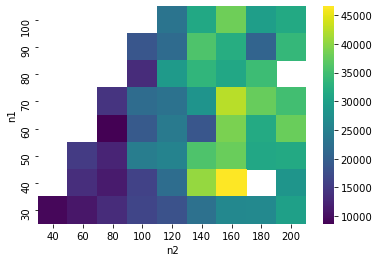

In [24]:
%matplotlib inline

import seaborn as sns


sns.heatmap(hm[::-1], cmap='viridis')

In [25]:


from backtesting.lib import plot_heatmaps


plot_heatmaps(heatmap, agg='mean')



Column(id='3203', ...)

In [27]:
! pip install scikit-optimize

In [33]:
#Model-based optimization
stats_skopt, heatmap, optimize_result = backtest.optimize(
    n1=[10, 100],      # Note: For method="skopt", we
    n2=[20, 200],      # only need interval end-points
    n_enter=[10, 40],
    n_exit=[10, 30],
    constraint=lambda p: p.n_exit < p.n_enter < p.n1 < p.n2,
    maximize='Equity Final [$]',
    method='skopt',
    max_tries=200,
    random_state=0,
    return_heatmap=True,
    return_optimization=True)

Backtest.optimize:   0%|          | 0/200 [00:00<?, ?it/s]

In [29]:
heatmap.sort_values().iloc[-3:]

n1  n2   n_enter  n_exit
72  162  26       18        73263.585932
45  166  32       22        81605.446483
62  184  26       22        96362.055574
Name: Equity Final [$], dtype: float64

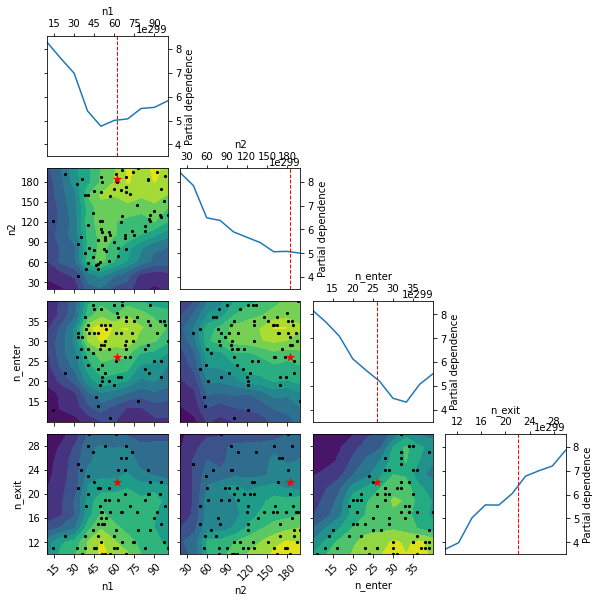

In [30]:
from skopt.plots import plot_objective

_ = plot_objective(optimize_result, n_points=10)

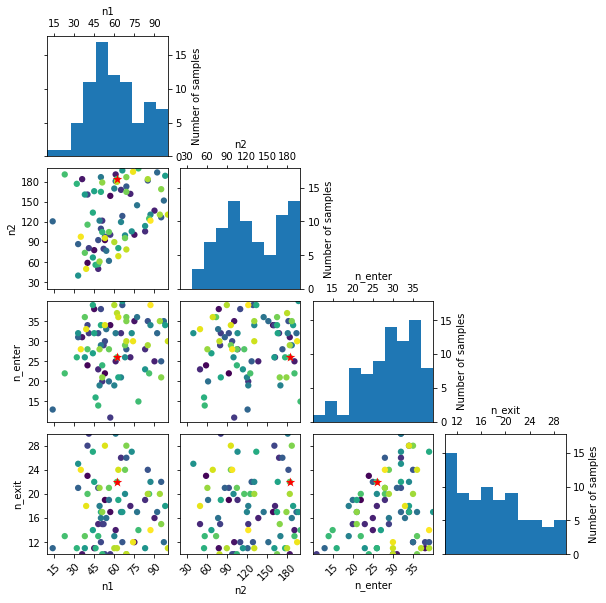

In [31]:


from skopt.plots import plot_evaluations

_ = plot_evaluations(optimize_result, bins=10)



In [36]:
stats_skopt

Start                     2009-12-31 00:00:00
End                       2021-11-16 00:00:00
Duration                   4338 days 00:00:00
Exposure Time [%]                   56.770311
Equity Final [$]                 96362.055574
Equity Peak [$]                  98694.115968
Return [%]                         863.620556
Buy & Hold Return [%]             1906.358943
Return (Ann.) [%]                   21.031049
Volatility (Ann.) [%]               22.143664
Sharpe Ratio                         0.949755
Sortino Ratio                        1.835383
Calmar Ratio                         1.043299
Max. Drawdown [%]                  -20.158218
Avg. Drawdown [%]                   -2.975955
Max. Drawdown Duration      430 days 00:00:00
Avg. Drawdown Duration       37 days 00:00:00
# Trades                                  105
Win Rate [%]                        42.857143
Best Trade [%]                      57.015252
Worst Trade [%]                    -10.459801
Avg. Trade [%]                    

In [37]:
#optimal params for algos
stats_skopt._strategy

<Strategy Sma4Cross(n1=62,n2=184,n_enter=26,n_exit=22)>

In [40]:


backtest.plot(plot_volume=False, plot_pl=False)

Row(id='3953', ...)

In [38]:
stats_skopt['_equity_curve'] 

Equity  DrawdownPct DrawdownDuration
2009-12-31  10000.000000     0.000000              NaT
2010-01-04  10000.000000     0.000000              NaT
2010-01-05  10000.000000     0.000000              NaT
2010-01-06  10000.000000     0.000000              NaT
2010-01-07  10000.000000     0.000000              NaT
...                  ...          ...              ...
2021-11-10  95690.210054     0.030437              NaT
2021-11-11  96362.055574     0.023629              NaT
2021-11-12  96362.055574     0.023629              NaT
2021-11-15  96362.055574     0.023629              NaT
2021-11-16  96362.055574     0.023629          19 days

[2991 rows x 3 columns]

In [39]:
stats_skopt['_trades']  # Contains individual trade data

Size  EntryBar  ExitBar  EntryPrice   ExitPrice           PnL  ReturnPct  \
0     900       226      227   11.109675   11.142857     29.863782   0.002987   
1     893       228      267   11.227410   11.673929    398.741727   0.039770   
2     866       268      272   12.035810   11.992857    -37.197345  -0.003569   
3     826       291      293   12.569374   12.498571    -58.483237  -0.005633   
4     844       302      303   12.242293   12.214286    -23.638098  -0.002288   
..    ...       ...      ...         ...         ...           ...        ...   
100   637      2831     2854  123.907324  129.199997   3371.432879   0.042715   
101   645      2878     2920  127.464419  146.199997  12084.447723   0.146987   
102   632      2924     2928  149.267941  145.029999  -2678.379625  -0.028392   
103   617      2930     2944  148.606618  150.630005   1248.429982   0.013616   
104   646      2969     2987  143.736897  148.960007   3374.128913   0.036338   

     EntryTime   ExitTime Duration  
0   2010-11-23 2010-11-24   1 days  
1   2010-11-26 2011-01-24  59 days  
2   2011-01-25 2011-01-31   6 days  
3   2011-02-28 2011-03-02   2 days  
4   2011-03-15 2011-03-16   1 days  
..         ...        ...      ...  
100 2021-04-01 2021-05-05  34 days  
101 2021-06-09 2021-08-09  61 days  
102 2021-08-13 2021-08-19   6 days  
103 2021-08-23 2021-09-13  21 days  
104 2021-10-18 2021-11-11  24 days  

[105 rows x 10 columns]